<a href="https://colab.research.google.com/github/WinningHabits/lottery/blob/main/03_Day_Specific_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [1]:
import pandas as pd


In [1]:
import pandas as pd


In [3]:
import pandas as pd

url = 'https://raw.githubusercontent.com/WinningHabits/lottery_dataset/main/lottery-toto_upto_08.23_revised_1.xlsx'
data = pd.read_excel(url)


In [4]:
data['Date by Month'] = pd.to_datetime(data['Date by Month'], format='%d.%m.%y')


In [8]:
print(data.columns)


Index(['Date by Month', 'Draw number 1', 'Draw number 2', 'Draw number 3',
       'Draw number 4', 'Draw number 5', 'Draw number 6', 'Additional Number'],
      dtype='object')


In [ ]:
Index(['Date by Month', 'Draw number 1', 'Draw number 2', 'Draw number 3',
       'Draw number 4', 'Draw number 5', 'Draw number 6', 'Additional Number'],
      dtype='object')

In [9]:
data['Date by Month'] = pd.to_datetime(data['Date by Month'], format='%d.%m.%y')


In [10]:
data['Day'] = data['Date by Month'].dt.day_name()


In [12]:
data['Day'] = data['Date by Month'].dt.day_name()


In [13]:
monday_data = data[data['Day'] == 'Monday']
thursday_data = data[data['Day'] == 'Thursday']


In [15]:
import matplotlib.pyplot as plt


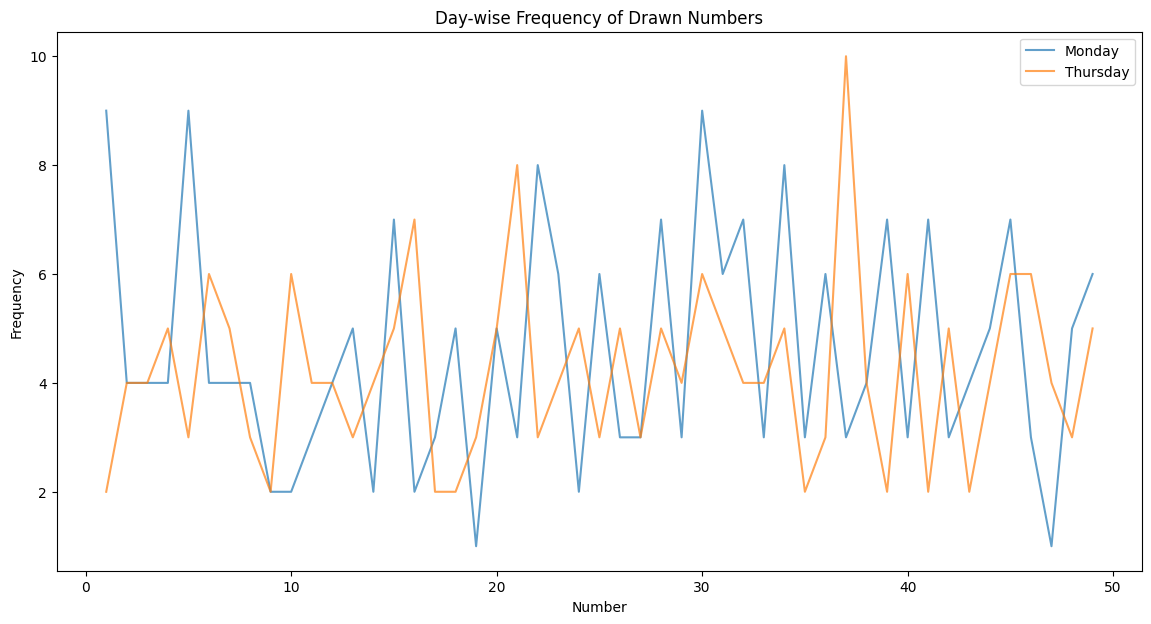

In [16]:
# Calculate frequencies
monday_frequencies = monday_data.drop(columns=['Date by Month', 'Day']).stack().value_counts().sort_index()
thursday_frequencies = thursday_data.drop(columns=['Date by Month', 'Day']).stack().value_counts().sort_index()

# Plotting
plt.figure(figsize=(14, 7))
monday_frequencies.plot(label='Monday', alpha=0.7)
thursday_frequencies.plot(label='Thursday', alpha=0.7)
plt.title('Day-wise Frequency of Drawn Numbers')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [17]:
difference = (monday_frequencies - thursday_frequencies).abs()
anomalies = difference.sort_values(ascending=False).head(10)

# Displaying the top 10 numbers with the most significant differences between Monday and Thursday frequencies
print(anomalies)


1     7.0
37    7.0
5     6.0
41    5.0
22    5.0
21    5.0
16    5.0
39    5.0
10    4.0
40    3.0
dtype: float64


In [18]:
# For simplicity, let's analyze pairs of numbers
from itertools import combinations

def calculate_combinations_frequencies(data):
    comb_freq = {}
    for _, row in data.iterrows():
        drawn_numbers = row[1:-1].values
        for comb in combinations(drawn_numbers, 2):
            comb_freq[tuple(sorted(comb))] = comb_freq.get(tuple(sorted(comb)), 0) + 1
    return comb_freq

monday_combinations = calculate_combinations_frequencies(monday_data)
thursday_combinations = calculate_combinations_frequencies(thursday_data)

# Displaying top 5 combinations for each day
print("Top 5 Monday combinations:", sorted(monday_combinations, key=monday_combinations.get, reverse=True)[:5])
print("Top 5 Thursday combinations:", sorted(thursday_combinations, key=thursday_combinations.get, reverse=True)[:5])


Top 5 Monday combinations: [(5, 31), (1, 45), (25, 32), (1, 13), (1, 15)]
Top 5 Thursday combinations: [(6, 31), (28, 37), (2, 34), (21, 40), (10, 20)]


In [19]:
monday_unique_combinations = set(monday_combinations.keys()) - set(thursday_combinations.keys())
thursday_unique_combinations = set(thursday_combinations.keys()) - set(monday_combinations.keys())

print("Unique combinations for Monday:", monday_unique_combinations)
print("Unique combinations for Thursday:", thursday_unique_combinations)


Unique combinations for Monday: {(26, 30), (18, 35), (18, 44), (40, 41), (11, 23), (41, 42), (2, 32), (2, 41), (3, 15), (22, 46), (7, 12), (36, 48), (17, 44), (18, 21), (7, 30), (6, 34), (48, 49), (21, 41), (25, 38), (22, 23), (22, 32), (28, 39), (17, 39), (29, 49), (2, 22), (32, 41), (13, 46), (3, 23), (14, 32), (17, 34), (28, 43), (5, 41), (17, 43), (29, 35), (21, 49), (39, 48), (2, 35), (32, 36), (13, 32), (24, 32), (13, 41), (24, 41), (3, 18), (1, 48), (17, 29), (36, 42), (9, 25), (5, 36), (9, 34), (6, 10), (9, 43), (29, 30), (39, 43), (20, 48), (12, 44), (2, 30), (13, 27), (35, 36), (1, 34), (43, 49), (1, 43), (9, 11), (5, 22), (36, 37), (5, 31), (28, 33), (28, 42), (6, 23), (42, 44), (31, 34), (20, 34), (31, 43), (2, 7), (23, 39), (23, 48), (4, 44), (13, 22), (16, 18), (1, 29), (1, 47), (5, 17), (17, 28), (5, 26), (23, 25), (12, 25), (20, 38), (23, 34), (4, 39), (1, 15), (13, 26), (32, 39), (16, 31), (13, 44), (1, 42), (5, 12), (5, 21), (5, 39), (27, 45), (30, 41), (8, 41), (23, 